In [25]:
import yfinance as yf


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
pip install matplotlib

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [30]:
df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [31]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-06-09,33416.976562,37537.371094,32475.865234,37345.121094,37345.121094,53972919008
2021-06-10,37389.515625,38334.324219,35847.593750,36702.597656,36702.597656,43576032854
2021-06-11,36697.031250,37608.695312,36044.449219,37334.398438,37334.398438,38699736985


In [32]:

df.reset_index(inplace=True)

In [33]:
df = df[["Date", "Close"]]


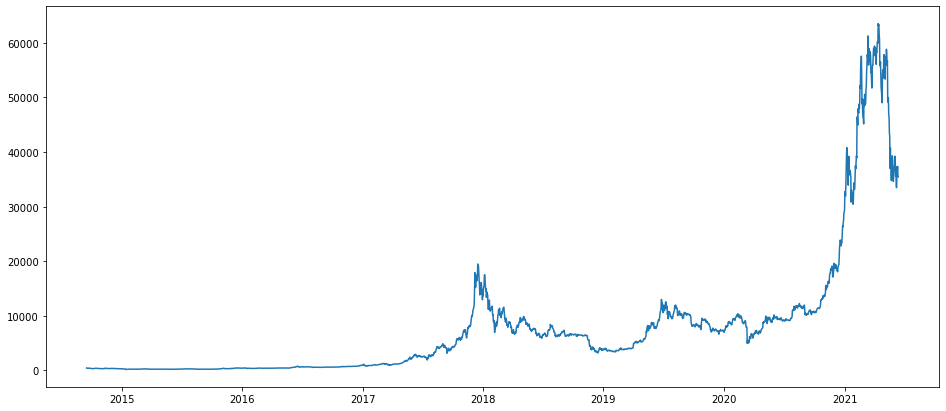

In [34]:
plt.figure(figsize=(16,7))
plt.plot(df["Date"], df["Close"])

In [35]:
df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()


<ipython-input-35-6c0552a16a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()


In [36]:
df["Close"]

0      -0.618212
1      -0.621008
2      -0.623527
3      -0.622328
4      -0.623185
          ...   
2453    2.516891
2454    2.462283
2455    2.515980
2456    2.364537
2457    2.354615
Name: Close, Length: 2458, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(df["Close"], test_size=0.2, shuffle=False)
x_val, x_test = train_test_split(x_val, test_size=0.4, shuffle=False)


In [38]:
x_train

0      -0.618212
1      -0.621008
2      -0.623527
3      -0.622328
4      -0.623185
          ...   
1961    0.151091
1962    0.137623
1963    0.141222
1964    0.137099
1965    0.132778
Name: Close, Length: 1966, dtype: float64

In [39]:
x_val

1966    0.123212
1967    0.159967
1968    0.169858
1969    0.175479
1970    0.181358
          ...   
2256    0.966868
2257    0.934967
2258    0.800555
2259    0.796967
2260    0.848727
Name: Close, Length: 295, dtype: float64

In [40]:
x_test

2261    0.887829
2262    1.010924
2263    0.940991
2264    0.974825
2265    0.995589
          ...   
2453    2.516891
2454    2.462283
2455    2.515980
2456    2.364537
2457    2.354615
Name: Close, Length: 197, dtype: float64

In [41]:
window_size = 15
batch_size =32
shuffle_buffer = x_train.shape[0]

In [42]:
def window_ds(series, window_size, batch_size, shuffle_buffer):
    ds= tf.data.Dataset.from_tensor_slices(series)# computing the tensor data
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size +1))
    ds = ds.shuffle(shuffle_buffer).map(lambda w: (w[:-1], w[-1]))
    ds= ds.batch(batch_size).prefetch(1)
    return ds

In [43]:
x_train_ds = window_ds(x_train, window_size,batch_size, shuffle_buffer)
x_val_ds = window_ds(x_train, window_size,batch_size, x_val.shape[0])

In [44]:
for i in x_train_ds:
    print(i)

(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[-0.61684113, -0.61203273, -0.61235628, -0.61170772, -0.61191833,
        -0.61144799, -0.61135858, -0.60870502, -0.60840474, -0.60821352,
        -0.60731602, -0.60807583, -0.6076468 , -0.60824301, -0.60800164],
       [-0.59943172, -0.59858106, -0.59846734, -0.5963572 , -0.59742935,
        -0.59750517, -0.59505566, -0.59411771, -0.59854817, -0.59731283,
        -0.59729728, -0.59660852, -0.59732167, -0.59675079, -0.5956098 ],
       [-0.03897045, -0.04004644, -0.03141142, -0.07975644, -0.10216499,
        -0.1074429 , -0.12793319, -0.12156913, -0.11911798, -0.1198404 ,
        -0.11723973, -0.10317297, -0.10356393, -0.10097256, -0.10318401],
       [ 0.20396028,  0.22749487,  0.20641695,  0.20459447,  0.22433795,
         0.20858752,  0.17195016,  0.1511936 ,  0.15867051,  0.16143186,
         0.17225169,  0.22229312,  0.24581667,  0.24334797,  0.24173655],
       [-0.60721267, -0.60749637, -0.60777114, -0.6079769 , -0.607816

(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[-0.62481407, -0.62442235, -0.62377668, -0.62247038, -0.62306914,
        -0.62244845, -0.62169765, -0.62118337, -0.62131834, -0.61992628,
        -0.61978741, -0.61987665, -0.6213225 , -0.62096393, -0.62099886],
       [-0.60821352, -0.60731602, -0.60807583, -0.6076468 , -0.60824301,
        -0.60800164, -0.60551508, -0.59990087, -0.59721586, -0.59881512,
        -0.59805786, -0.59195224, -0.59343099, -0.59280903, -0.59216701],
       [-0.63676676, -0.63701298, -0.63755174, -0.63690989, -0.63635499,
        -0.6365276 , -0.63665815, -0.6364999 , -0.6365888 , -0.63699122,
        -0.63694431, -0.63688686, -0.63701026, -0.6369551 , -0.63726736],
       [-0.62583047, -0.6210824 , -0.62132259, -0.62327031, -0.62511332,
        -0.62411477, -0.62415506, -0.62519279, -0.6247375 , -0.62666805,
        -0.6272623 , -0.6270862 , -0.62584084, -0.62504805, -0.62518004],
       [-0.62924207, -0.62899236, -0.62822796, -0.62739472, -0.627979

       -0.1614355 , -0.28553746])>)
(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[ 0.10297083,  0.08286524,  0.07873449,  0.08623505,  0.08070911,
         0.05739114,  0.06069888,  0.05410474,  0.07356602,  0.10016707,
         0.1383082 ,  0.13474201,  0.15109102,  0.13762313,  0.1412221 ],
       [-0.6369551 , -0.63726736, -0.63736773, -0.63719172, -0.63707902,
        -0.63665373, -0.63677917, -0.63660231, -0.63692893, -0.63692842,
        -0.63691422, -0.6369036 , -0.63693012, -0.63724891, -0.63751706],
       [-0.63740632, -0.6374302 , -0.63778095, -0.63748068, -0.63750915,
        -0.63714829, -0.63709602, -0.63716435, -0.63729889, -0.63675623,
        -0.63696488, -0.63701817, -0.63689162, -0.63691337, -0.63679124],
       [-0.0328372 , -0.02724718, -0.02719103,  0.00322715,  0.03675353,
         0.02962883,  0.0125635 ,  0.03699675,  0.0260316 ,  0.0392014 ,
         0.03509638,  0.09319322,  0.09142934,  0.08435605,  0.10180047],
       [-0.6195672 , -0.61888422,

In [45]:
input_layer = tf.keras.layers.Input(shape=[window_size])
l0 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
l1 = tf.keras.layers.Dense(256, activation="relu")(l0)
output_l = tf.keras.layers.Dense(1)(l1)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_l)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer="RMSprop", 
             loss="mse",
             metrics="mse")
model.fit(x_train_ds, validation_data=x_val_ds, epochs=100)

Epoch 1/100
61/61 [==============================] - 3s 26ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2/100
61/61 [==============================] - 3s 29ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/100
61/61 [==============================] - 2s 16ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4/100
61/61 [==============================] - 2s 28ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7573e-04 - val_mse: 7.7573e-04
Epoch 5/100
61/61 [==============================] - 2s 27ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/100
61/61 [==============================] - 2s 27ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 5.9600e-04 - val_mse: 5.9600e-04
Epoch 7/100
61/61 [==============================] - 2s 27ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 8/100
61/61 [==============================] - 2s 30ms

In [47]:
x_test = x_test.to_numpy()
forecast = []
buys = {}
sells = {}

for i in range(0, len(x_test) - window_size, window_size):
    f = model.predict(x_test[i:i+window_size][np.newaxis])[0][0]

    if f > x_test[window_size]:
        buys.update({i+window_size:x_test[i+window_size]})
    elif f < x_test[window_size]:
        sells.update({i+window_size:x_test[i+window_size]})

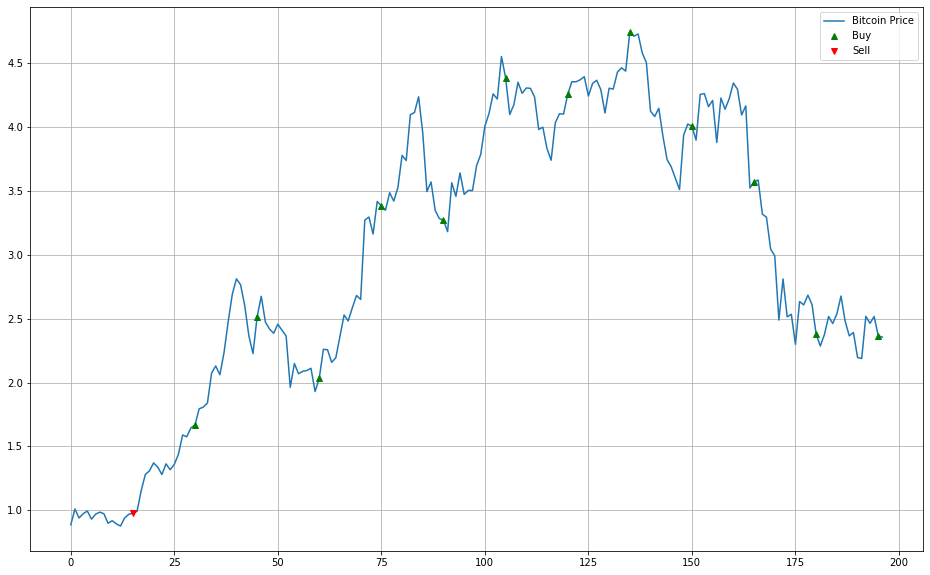

In [48]:
plt.figure(figsize=(16, 10))
plt.plot(x_test, label="Bitcoin Price") 
plt.plot(forecast, label="")
plt.plot(list(buys.keys()), list(buys.values()), "^", color="g", label="Buy")
plt.plot(list(sells.keys()), list(sells.values()), "v", color="r", label="Sell")
plt.legend()
plt.grid(True)
